## Predict The News Category

It was one of the best hackathon problem given by **CYPHER-2019 ** Team. It is very interesting problem we can learn around 70% of Natural Language Processing. By seeing the dataset I was amazed how to solve this? But while founding the solution I learned almost everything about the NLP.
 
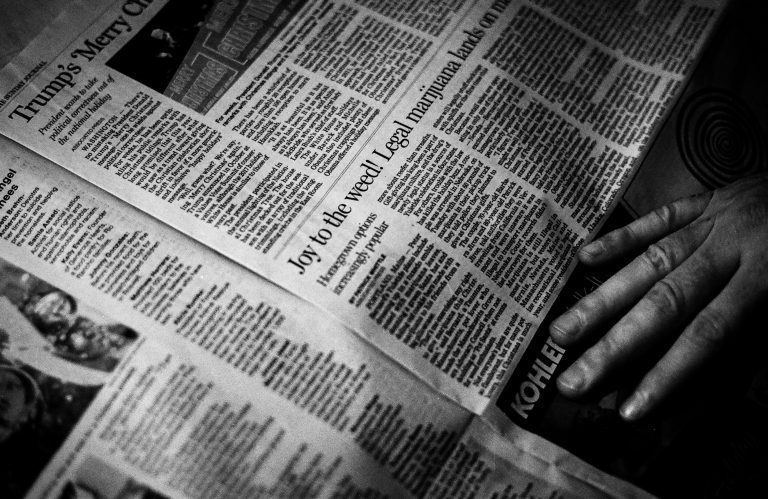

By end of this kernel, I will share my knowledge how to approach this kind of models by solving the present News category hackathon dataset.


## TOPICS

1) [Text Preprocessing](#section1)

2) [Converting Text To numerical Machine Understandable format](#section2)

2.1) [Bag of Words](#section2.1)

2.2) [TF-IDF](#section2.2)

2.3) [Word Embeddings](#section2.3)

3)   [Loading Word Embeddings to Train the model using Keras](#section3)
  

### **If you feel Kernel useful Plz Upvote...!**

Importing the packages required.

In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gensim
from gensim.models import Word2Vec
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
import string
import sklearn
import string
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train=pd.read_excel('/kaggle/input/mh-newspred/Data_Train.xlsx')
df_test=pd.read_excel('/kaggle/input/mh-newspred/Data_Test.xlsx')

#since it is large file we can't open '.xlsx files in kaggle use the following code lines after adding the data in your kernel, It will going to display the path of your data set, So copy the followoing paths and add to load the data. 

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
   # for filename in filenames:
       # print(os.path.join(dirname, filename))
        
df_train.head()

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


In [3]:
df_test.head()

,STORY
0,2019 will see gadgets like gaming smartphones ...
1,It has also unleashed a wave of changes in the...
2,It can be confusing to pick the right smartpho...
3,The mobile application is integrated with a da...
4,We have rounded up some of the gadgets that sh...


## Text Preprocessing <a id='section1'></a>

In this kernel, we will talk about the basic steps of text preprocessing.

These steps are needed for transferring text from human language to machine-readable format for further processing. We will also discuss text preprocessing tools.
After a text is obtained, we start with text normalization. Text normalization includes:

**converting all letters to lower or upper case**

**converting numbers into words or removing numbers**

**removing punctuations, accent marks and other diacritics**

**removing white spaces**

**expanding abbreviations**

**removing stop words, sparse terms, and particular words**

**applying lemmatization**

In [4]:
#creating a data frame and adding NEWS column  to it.
df=df_train[["STORY"]]
df["STORY"]=df["STORY"].astype(str)
df.head()

#coverting all the words to lower case for case sensitive
df["text_lower"]=df["STORY"].str.lower()
df.head()

#converting to string format and adding that as one column in 'df' data frame, 
df["text_lower"]=df["STORY"].str.lower()
df.head()


#Removing all the special characters in the data which is not required. For instance (don't,wasn't she's, , . ! etc) 
import warnings
import re
PUNCT_TO_REMOVE = string.punctuation   
def remove_punctuation(text_lower):
    return text_lower.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["removed_punctuations"]=df["text_lower"].apply(lambda text_lower: remove_punctuation(text_lower))
#df.head()
df["removed_punctuations"]=df["removed_punctuations"].astype(str)
text=df["removed_punctuations"]


# for removing special characters from the data ((!,@,#,$,%,^,&,*,(,) 
text = text.apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x))) 
df["special_removed"]=text.astype(str)
df.head()


,STORY,text_lower,removed_punctuations,special_removed
0,But the most painful was the huge reversal in ...,but the most painful was the huge reversal in ...,but the most painful was the huge reversal in ...,but the most painful was the huge reversal in ...
1,How formidable is the opposition alliance amon...,how formidable is the opposition alliance amon...,how formidable is the opposition alliance amon...,how formidable is the opposition alliance amon...
2,Most Asian currencies were trading lower today...,most asian currencies were trading lower today...,most asian currencies were trading lower today...,most asian currencies were trading lower today...
3,"If you want to answer any question, click on ‘...","if you want to answer any question, click on ‘...",if you want to answer any question click on ‘a...,if you want to answer any question click on an...
4,"In global markets, gold prices edged up today ...","in global markets, gold prices edged up today ...",in global markets gold prices edged up today a...,in global markets gold prices edged up today a...


In [5]:
#for removing numbers in the text data  
text2= df["special_removed"].apply((lambda x: re.sub(r"\d", "", x)))   #df['special_removed']=re.sub(r"\d", "", df['special_removed'])
df["numbers_removed"]=text2.astype(str)

#converting to string
df["special_removed"]=text.astype(str)
df["special_removed"]=df["special_removed"].astype(str)
#df.head()


#for removing of white spaces 
#df['numbers_removed']=df['numbers_removed'].str.strip()

# for removing extra white spaces
text3=df['numbers_removed'].apply((lambda x: re.sub(r"\s+", " ", x)))
df["whitespace_removed"]=text3.astype(str)

#removing of stop words
from nltk.corpus import stopwords
", " .join(stopwords.words('english'))

stopwords=set(stopwords.words('english'))

def remove_stopwords(sent):
    return " " .join([word for word in str(sent).split()
                      if word not in stopwords])


df["stopwords_removed"]=df["whitespace_removed"].apply(lambda sent: remove_stopwords(sent))
df.head()

,STORY,text_lower,removed_punctuations,special_removed,numbers_removed,whitespace_removed,stopwords_removed
0,But the most painful was the huge reversal in ...,but the most painful was the huge reversal in ...,but the most painful was the huge reversal in ...,but the most painful was the huge reversal in ...,but the most painful was the huge reversal in ...,but the most painful was the huge reversal in ...,painful huge reversal fee income unheard among...
1,How formidable is the opposition alliance amon...,how formidable is the opposition alliance amon...,how formidable is the opposition alliance amon...,how formidable is the opposition alliance amon...,how formidable is the opposition alliance amon...,how formidable is the opposition alliance amon...,formidable opposition alliance among congress ...
2,Most Asian currencies were trading lower today...,most asian currencies were trading lower today...,most asian currencies were trading lower today...,most asian currencies were trading lower today...,most asian currencies were trading lower today...,most asian currencies were trading lower today...,asian currencies trading lower today south kor...
3,"If you want to answer any question, click on ‘...","if you want to answer any question, click on ‘...",if you want to answer any question click on ‘a...,if you want to answer any question click on an...,if you want to answer any question click on an...,if you want to answer any question click on an...,want answer question click answer clicking ans...
4,"In global markets, gold prices edged up today ...","in global markets, gold prices edged up today ...",in global markets gold prices edged up today a...,in global markets gold prices edged up today a...,in global markets gold prices edged up today a...,in global markets gold prices edged up today a...,global markets gold prices edged today disappo...


### Lemmatisation 

Lemmatisation is closely related to stemming. The difference is that a stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech. However, stemmers are typically easier to implement and run faster, and the reduced accuracy may not matter for some applications.

**For instance:**

The word "better" has "good" as its lemma. This link is missed by stemming, as it requires a dictionary look-up.

The word "walk" is the base form for word "walking", and hence this is matched in both stemming and lemmatisation.

The word "meeting" can be either the base form of a noun or a form of a verb ("to meet") depending on the context, e.g., "in our last meeting" or "We are meeting again tomorrow". Unlike stemming, lemmatisation can in principle select the appropriate lemma depending on the context.

for more about stemming and lemmatizer https://towardsdatascience.com/stemming-lemmatization-what-ba782b7c0bd8

In [6]:
import nltk
from nltk.corpus import wordnet 
from nltk.stem import WordNetLemmatizer
#df.drop(["lemmatize_words"], axis=1, inplace=True) 
lemmatizer = WordNetLemmatizer()
def lemmatize_words(sent):
    return " ".join([lemmatizer.lemmatize(word) for word in sent.split()])

df["lemmatized"] = df["stopwords_removed"].apply(lambda sent: lemmatize_words(sent))
#df.drop(["text_lemmatized"], axis=1, inplace=True) 


#removing of single characters
text4= df["lemmatized"].apply((lambda x: re.sub(r'\s+[a-zA-Z]\s+', ' ', x)))   #df['special_removed']=re.sub(r"\d", "", df['special_removed'])
df["singlechar_removed"]=text4.astype(str)

#removing extra spaces
text5=df['lemmatized'].apply((lambda x: re.sub(r"\s+", " ", x)))
df["space_removed"]=text5.astype(str)

#removing letters below 3 (and,how, why, etc)
text6=df['space_removed'].apply((lambda x: re.sub(r'\W*\b\w{1,3}\b', " ", x)))
df["singledouble"]=text6.astype(str)

text7=df['space_removed'].apply((lambda x: re.sub(r"\s+", " ", x)))
df["singledouble"]=text7.astype(str)

extra=df["singledouble"].str.strip()
df["strip"]=extra.astype(str)
df.head()

,STORY,text_lower,removed_punctuations,special_removed,numbers_removed,whitespace_removed,stopwords_removed,lemmatized,singlechar_removed,space_removed,singledouble,strip
0,But the most painful was the huge reversal in ...,but the most painful was the huge reversal in ...,but the most painful was the huge reversal in ...,but the most painful was the huge reversal in ...,but the most painful was the huge reversal in ...,but the most painful was the huge reversal in ...,painful huge reversal fee income unheard among...,painful huge reversal fee income unheard among...,painful huge reversal fee income unheard among...,painful huge reversal fee income unheard among...,painful huge reversal fee income unheard among...,painful huge reversal fee income unheard among...
1,How formidable is the opposition alliance amon...,how formidable is the opposition alliance amon...,how formidable is the opposition alliance amon...,how formidable is the opposition alliance amon...,how formidable is the opposition alliance amon...,how formidable is the opposition alliance amon...,formidable opposition alliance among congress ...,formidable opposition alliance among congress ...,formidable opposition alliance among congress ...,formidable opposition alliance among congress ...,formidable opposition alliance among congress ...,formidable opposition alliance among congress ...
2,Most Asian currencies were trading lower today...,most asian currencies were trading lower today...,most asian currencies were trading lower today...,most asian currencies were trading lower today...,most asian currencies were trading lower today...,most asian currencies were trading lower today...,asian currencies trading lower today south kor...,asian currency trading lower today south korea...,asian currency trading lower today south korea...,asian currency trading lower today south korea...,asian currency trading lower today south korea...,asian currency trading lower today south korea...
3,"If you want to answer any question, click on ‘...","if you want to answer any question, click on ‘...",if you want to answer any question click on ‘a...,if you want to answer any question click on an...,if you want to answer any question click on an...,if you want to answer any question click on an...,want answer question click answer clicking ans...,want answer question click answer clicking ans...,want answer question click answer clicking ans...,want answer question click answer clicking ans...,want answer question click answer clicking ans...,want answer question click answer clicking ans...
4,"In global markets, gold prices edged up today ...","in global markets, gold prices edged up today ...",in global markets gold prices edged up today a...,in global markets gold prices edged up today a...,in global markets gold prices edged up today a...,in global markets gold prices edged up today a...,global markets gold prices edged today disappo...,global market gold price edged today disappoin...,global market gold price edged today disappoin...,global market gold price edged today disappoin...,global market gold price edged today disappoin...,global market gold price edged today disappoin...


## Converting Text To numerical Machine Understandable way <a id='section2'></a>

There three approaches to do this:

1) Bag of Words

2) TF-IDF

3) Word Embeddings

## 1) Bag of Words <a id='section2.1'></a>

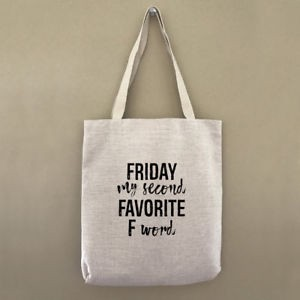

we will study another very useful model that converts text to numbers i.e. the Bag of Words (BOW).

Since most of the statistical algorithms, e.g machine learning and deep learning techniques, work with numeric data, therefore we have to convert text into numbers. Several approaches exist in this regard. However, the most famous ones are Bag of Words, TF-IDF, and word2vec. Though several libraries exist, such as Scikit-Learn and NLTK, which can implement these techniques in one line of code, it is important to understand the working principle behind these word embedding techniques. The best way to do so is to implement these techniques from scratch in Python and this is what we are going to do today.

If you are getting confused, let me give you an example:

Let us say that you dataset consist of only two sentences:

I love coffee.
I like dogs.
Vocab: {I, love, coffee, I, like, dogs}

Integers assigned:

I: 0, love: 1, coffee: 2, like: 3, dogs: 4

Vector representations:

I: [1,0,0,0,0]

love: [0,1,0,0,0]

coffee: [0,0,1,0,0]

like: [0,0,0,1,0]

dogs: [0,0,0,0,1]

This type of word representation is called one-hot vector representation.

But, as you can see same words in the same sentences than instead of 1 it will add how many times words was repeated for instance (2,3)

In [7]:
#Bag of words creation
from sklearn.feature_extraction.text import CountVectorizer 
bow_vectorizer = CountVectorizer(max_df=0.70, min_df=2, max_features=1000, stop_words='english')
#max_df= atleast the words needs to present in 70% of the documents
#min_df=2 (at least 2 times the words need to preset among all the documents)
#maxfeatures= set of unique words
 
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df['strip'])
print(bow)

  (0, 442)	1
  (0, 364)	1
  (0, 388)	1
  (0, 160)	1
  (0, 867)	1
  (0, 684)	2
  (0, 336)	1
  (0, 396)	1
  (0, 498)	1
  (0, 428)	2
  (0, 573)	1
  (0, 355)	1
  (0, 334)	1
  (0, 965)	1
  (0, 617)	1
  (0, 803)	1
  (0, 303)	1
  (0, 926)	1
  (0, 96)	1
  (0, 210)	2
  (0, 488)	2
  (0, 910)	1
  (0, 65)	1
  (0, 992)	1
  (0, 526)	2
  :	:
  (7626, 209)	1
  (7626, 775)	1
  (7626, 88)	1
  (7626, 616)	3
  (7626, 73)	1
  (7626, 78)	1
  (7626, 726)	1
  (7626, 552)	1
  (7626, 358)	1
  (7626, 219)	1
  (7626, 215)	1
  (7626, 374)	1
  (7626, 367)	1
  (7626, 759)	1
  (7626, 748)	1
  (7626, 434)	1
  (7626, 620)	3
  (7626, 990)	1
  (7626, 761)	2
  (7626, 469)	1
  (7626, 505)	1
  (7626, 175)	4
  (7626, 25)	2
  (7626, 684)	1
  (7627, 849)	1


## TF-IDF <a id='section2.2'></a>

**TF-IDF stands for “Term Frequency — Inverse Document Frequency”.**   

This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining. If i give you a sentence for example “This building is so tall”. Its easy for us to understand the sentence as we know the semantics of the words and the sentence. But how will the computer understand this sentence? The computer can understand any data only in the form of numerical value. So, for this reason we vectorize all of the text so that the computer can understand the text better. By vectorizing the documents we can further perform multiple tasks such as finding the relevant documents, ranking, clustering and so on. This is the same thing that happens when you perform a google search. The web pages are called documents and the search text with which you search is called a query. google maintains a fixed representation for all of the documents. When you search with a query, google will find the relevance of the query with all of the documents, ranks them in the order of relevance and shows you the top k documents, all of this process is done using the vectorized form of query and documents. Although Googles algorithms are highly sophisticated and optimized, this is their underlying structure. Now coming back to our TF-IDF,

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

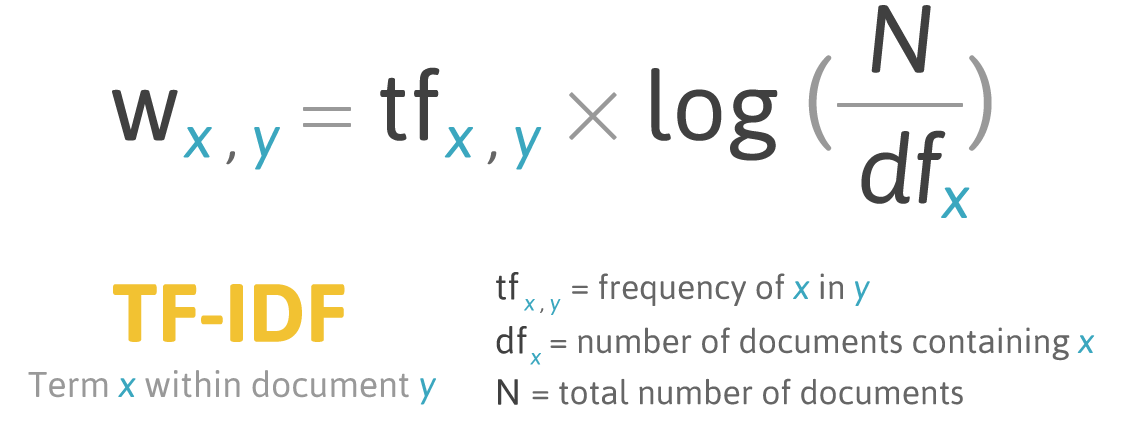

In [8]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(df['strip'])
print(processed_features)

  (0, 1058)	0.11016635838597003
  (0, 829)	0.5262432923404259
  (0, 1090)	0.21292295286030197
  (0, 95)	0.08416467304109138
  (0, 1683)	0.10675941353446027
  (0, 1949)	0.10545012491400123
  (0, 1254)	0.1268696933335817
  (0, 734)	0.13695180072046578
  (0, 1356)	0.1931301884877936
  (0, 2482)	0.12177873634647683
  (0, 197)	0.08590785517722391
  (0, 2263)	0.10055083973083791
  (0, 1285)	0.22843697507608374
  (0, 552)	0.1946490109309427
  (0, 1556)	0.12177873634647683
  (0, 266)	0.11400714467904041
  (0, 2309)	0.11766725425821
  (0, 832)	0.10182324714112355
  (0, 1999)	0.1192186139307011
  (0, 1663)	0.12725621057754571
  (0, 1768)	0.11895213688063626
  (0, 1433)	0.09520983562226469
  (0, 1576)	0.09226896211860554
  (0, 2412)	0.0811438862159123
  (0, 2172)	0.12060303792279645
  :	:
  (7626, 88)	0.21739831712550392
  (7626, 1539)	0.08948762355207122
  (7626, 1813)	0.09181723817280339
  (7626, 608)	0.08660473337169136
  (7626, 2044)	0.09992789973865741
  (7626, 1638)	0.08890647873093128
  (7

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from keras.utils import to_categorical

X2=processed_features
y=df_train["SECTION"]

print(y)

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
logpredicted_classes = model.predict(X_test)
print(confusion_matrix(y_test,logpredicted_classes))
print(classification_report(y_test,logpredicted_classes))
print(accuracy_score(y_test, logpredicted_classes))

0       3
1       0
2       3
3       1
4       3
       ..
7623    0
7624    2
7625    1
7626    0
7627    2
Name: SECTION, Length: 7628, dtype: int64


Using TensorFlow backend.


[[334  10   3   3]
 [  4 526   7   4]
 [  4   3 368   1]
 [  1  10   1 247]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       350
           1       0.96      0.97      0.97       541
           2       0.97      0.98      0.97       376
           3       0.97      0.95      0.96       259

    accuracy                           0.97      1526
   macro avg       0.97      0.96      0.97      1526
weighted avg       0.97      0.97      0.97      1526

0.9665792922673656


Now using **Bag of Words** as a training set and check how much accuracy it is showing.

In [10]:
X=bow
y=df_train["SECTION"]
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

predictions = text_classifier.predict(X_test)
print(predictions)

0       3
1       0
2       3
3       1
4       3
       ..
7623    0
7624    2
7625    1
7626    0
7627    2
Name: SECTION, Length: 7628, dtype: int64
[3 1 2 ... 1 3 2]


## Metrics Evalutation

In [11]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[328  13   3   6]
 [  6 514  16   5]
 [ 11   8 354   3]
 [  3  10  10 236]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       350
           1       0.94      0.95      0.95       541
           2       0.92      0.94      0.93       376
           3       0.94      0.91      0.93       259

    accuracy                           0.94      1526
   macro avg       0.94      0.93      0.94      1526
weighted avg       0.94      0.94      0.94      1526

0.9384010484927916


## Word Embeddings <a id='section2.3'></a>

Word Embeddings: word embeddings are nothing but they store the similar kind of words for instance(synonyms of the words like 

**model.similarity('beautiful')**

*gorgeous 0.98, *

*wonderful 0.72,*

*amazing 0.65,*

*fantastic 0.60*

so all the kinds of same words will stored in one word vector. So when ever the new word we give which is not there in the training data but due to word embeddings it will find the related kinds of words for that particular word and classifies the model.

example: we will use word embeddings in Machine Translation models

*Word embeddings are of two types:*
 
** 1)Pre-trained word embeddings** : This word embeddings are already trained by experts we can load that models for training our data, 

***Word2Vec (by Google)***

***GloVe (by Stanford)***

***fastText (by Facebook)***

**Word2Vec:**

This model is provided by Google and is trained on Google News data. This model has 300 dimensions and is trained on 3 million words from google news data.
Team used skip-gram and negative sampling to build this model. It was released in 2013.

**GloVe:**

Global Vectors for words representation (GloVe) is provided by Stanford. They provided various models from 25, 50, 100, 200 to 300 dimensions based on 2, 6, 42, 840 billion tokens
Team used word-to-word co-occurrence to build this model. In other words, if two words co-occur many times, it means they have some linguistic or semantic similarity.

**fastText:**

This model is developed by Facebook. They provide 3 models with 300 dimensions each.
fastText is able to achieve good performance for word representations and sentence classifications because they are making use of character level representations.
Each word is represented as bag of characters n-grams in addition to the word itself. For example, for the word partial, with n=3, the fastText representation for the character n-grams is <pa, art, rti, tia, ial, al>. <and> are added as boundary symbols to separate the n-grams from the word itself.
 
** 2)Customized word embeddings** : This word embeddings can be created for our own data sets.




First lets learn how to load a model by using pre-trained word embeddings.

We are going to use google’s pre-trained model. It contains word vectors for a vocabulary of 3 million words trained on around 100 billion words from the google news dataset. The downlaod link for the model is this. Beware it is a 1.5 GB download. 

> you can download from this link   https://code.google.com/archive/p/word2vec/

Here in my data sets **I had uploaded google word2vec as text file** because to pass these pre trained word embeddings as a embedding layer for the model to learn.

**NOTE:** I takes long time to convert **'GoogleNews-vectors-negative300.bin' to .txt file** so better to use my data set in your kernel

DO THE BELOW LINES TO CHECK THE PATH OF YOUR FILES IN YOUR INPUT 

In [12]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/googleword2vec-as-text-file/googleVec.txt
/kaggle/input/mh-newspred/Data_Test.xlsx
/kaggle/input/mh-newspred/Sample_submission.xlsx
/kaggle/input/mh-newspred/Data_Train.xlsx
/kaggle/input/nlpword2vecembeddingspretrained/glove.6B.200d.txt
/kaggle/input/nlpword2vecembeddingspretrained/glove.6B.100d.txt
/kaggle/input/nlpword2vecembeddingspretrained/glove.6B.300d.txt
/kaggle/input/nlpword2vecembeddingspretrained/glove.6B.50d.txt
/kaggle/input/nlpword2vecembeddingspretrained/GoogleNews-vectors-negative300.bin


**Gensim** library has different models, from gensim we will going to perform Word2vec similary by using **spacy **library

**NOTE: ** *if you are doing in your loacal machines its better to install with ANACONDA by using 'conda install gensim' or pip install gensim*

Lets check how to load the pre trained model and find similar words.

In [13]:
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
#loading the downloaded model
model = KeyedVectors.load_word2vec_format('/kaggle/input/nlpword2vecembeddingspretrained/GoogleNews-vectors-negative300.bin', binary=True)

#the model is loaded. It can be used to perform all of the tasks mentioned above.

# getting word vectors of a word
dog = model['dog']
dog

array([ 5.12695312e-02, -2.23388672e-02, -1.72851562e-01,  1.61132812e-01,
       -8.44726562e-02,  5.73730469e-02,  5.85937500e-02, -8.25195312e-02,
       -1.53808594e-02, -6.34765625e-02,  1.79687500e-01, -4.23828125e-01,
       -2.25830078e-02, -1.66015625e-01, -2.51464844e-02,  1.07421875e-01,
       -1.99218750e-01,  1.59179688e-01, -1.87500000e-01, -1.20117188e-01,
        1.55273438e-01, -9.91210938e-02,  1.42578125e-01, -1.64062500e-01,
       -8.93554688e-02,  2.00195312e-01, -1.49414062e-01,  3.20312500e-01,
        3.28125000e-01,  2.44140625e-02, -9.71679688e-02, -8.20312500e-02,
       -3.63769531e-02, -8.59375000e-02, -9.86328125e-02,  7.78198242e-03,
       -1.34277344e-02,  5.27343750e-02,  1.48437500e-01,  3.33984375e-01,
        1.66015625e-02, -2.12890625e-01, -1.50756836e-02,  5.24902344e-02,
       -1.07421875e-01, -8.88671875e-02,  2.49023438e-01, -7.03125000e-02,
       -1.59912109e-02,  7.56835938e-02, -7.03125000e-02,  1.19140625e-01,
        2.29492188e-01,  

In [14]:
#perfoming similiar words for the given word from pre trained vectors
print(model.most_similar('AVENGERS'))

[('THE_AVENGERS', 0.7487392425537109), ('CAPTAIN_AMERICA', 0.734897792339325), ('FEAR_ITSELF', 0.7325863838195801), ('HELLBOY', 0.7308356165885925), ('PREQUEL', 0.727882444858551), ('FANTASTIC_FOUR', 0.7272425293922424), ('ZOMBIE', 0.7270960807800293), ('CATWOMAN', 0.7266433238983154), ('JUSTICE_LEAGUE', 0.7247129678726196), ('COMIC_BOOK', 0.723475992679596)]


In [15]:
#perfoming similiar words for the given word from pre trained vectors
print(model.most_similar('CRICKET'))

[('CRICKET_WORLD_CUP', 0.7040001153945923), ('BY_GREG_BUCKLE', 0.6919411420822144), ('CRICKETERS', 0.6809027791023254), ('RUGBY_UNION', 0.6701971292495728), ('THE_ASHES', 0.6665562391281128), ('HEADINGLEY', 0.6593257188796997), ('WEST_INDIES', 0.6580674648284912), ('TWENTY##', 0.6564605236053467), ('FOOTBALL', 0.6546390056610107), ('GLAMORGAN', 0.6486927270889282)]


In [16]:
#performing king queen magic
print(model.most_similar(positive=['woman', 'king'], negative=['man']))

[('queen', 0.7118192911148071), ('monarch', 0.6189674139022827), ('princess', 0.5902431607246399), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321243286133), ('kings', 0.5236844420433044), ('Queen_Consort', 0.5235945582389832), ('queens', 0.5181134343147278), ('sultan', 0.5098593235015869), ('monarchy', 0.5087411999702454)]


In [17]:
#picking odd one out
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


In [18]:
#printing similarity index
print(model.similarity('woman', 'man'))

0.76640123


### Creating pre trained word embeddings for our own dataset

*NOTE: Your Local Machine Computation need be more, It takes more Long time to create word embeddings, so better to take small data set with 100 sequence of words*

**continuation from the CELL NUMBER In[45]** ONCE CHECK In[45] and do the below code

In [19]:
train=df['strip']


#NOTE: #concatenating the 'strip column' because it is sereis of line,But if we want to do word embeddings all the tokens to be in one row, because it checks by word by word relation
join = ','.join(str(v) for v in train)
helo=join

#do this lines if you get get any error related objects 
#train.dropna
#train.dropna(inplace=True)


In [20]:
#IMPORT FROM NLTK 
from nltk.tokenize import sent_tokenize, word_tokenize
all_sentences = nltk.sent_tokenize(helo)
newsent = nltk.sent_tokenize(helo)  #This line makes all the data set of 7269 lines into one row
#print(newsent)

In [21]:
tokenwords = [nltk.word_tokenize(sent) for sent in newsent]   #This line makes all the data set of tokens into one row
#print(tokenwords)

create target label column 

In [22]:
classification=df_train['SECTION']
label=to_categorical([classification.values]) 
label

array([[[0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        ...,
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.]]], dtype=float32)

In [23]:
import gensim
from gensim.models import Word2Vec
word2vec = Word2Vec(tokenwords, min_count=2)  #min_count=2:atleast if the word repeated twice,than it will take into vector
vocabulary = word2vec.wv.vocab
#print(vocabulary)

# save model in ASCII (word2vec) format
#filename = 'embedding_word2vec.txt'
#model.wv.save_word2vec_format(filename, binary=False)

In [24]:
sim_words = word2vec.wv.most_similar(positive=['phone'])
sim_words


[('tendency', 0.37265801429748535),
 ('playstore', 0.35947296023368835),
 ('sanctioned', 0.3520658016204834),
 ('nomination', 0.34204190969467163),
 ('shahid', 0.3311886489391327),
 ('midtier', 0.3253365159034729),
 ('contributor', 0.32471996545791626),
 ('upgraded', 0.3235571086406708),
 ('race', 0.3221529722213745),
 ('electromagnetic', 0.32091572880744934)]

In [25]:
word2vec.wv.similarity('phone', 'selfies')

0.016972303

**HuHuHU Heyyyy It's Working :) :)**


*CHALLENGING TASK: *
Have you ever thought how to input this pre-trained and custom word embeddings to learn the model, Once think before going down

Now lets learn how to input this word embeddings to learn the model using 

### **Keras Model**  <a id='section3'></a>

Keras can be used to either learn custom words embedding or it can be used to load pretrained word embeddings. In this section, we will see how the Keras Embedding Layer can be used to learn custom word embeddings.

now lets check how this keras model makes us easier to do tokens and pre-processing tasks.

*Import the keras layers*

In [26]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

In the last section, we used one_hot function to convert text to vectors. Another approach is to use Tokenizer function from keras.preprocessing.text library.

You simply have to pass your corpus to the Tokenizer's fit_on_text method.

In [27]:
helo=df['strip']
from keras.preprocessing.text import Tokenizer
word_tokenizer=Tokenizer()
word_tokenizer.fit_on_texts(helo)

To get the number of unique words in the text, you can simply count the length of word_index dictionary of the word_tokenizer object. Remember to add 1 with the vocabulary size. This is to store the dimensions for the words for which no pretrained word embeddings exist.

shows the each word count

In [28]:
vocab_length = word_tokenizer.word_index
#print(vocab_length[10])

In [29]:
#shows the length of unique tokens and adding more space in vocab_length above 1
vocab_length = len(word_tokenizer.word_index) + 1
#print(vocab_length)

Finally, to convert sentences to their numeric counterpart, call the texts_to_sequences function and pass it the whole corpus.

In [30]:
trainembedded_sentences = word_tokenizer.texts_to_sequences(helo)
#print(trainembedded_sentences)

The next step is to find the number of words in the longest sentence and then to apply padding to the sentences having shorter lengths than the length of the longest sentence. because if you have a long words in one row and less in another row, so the matrix would be in appropriate shape, so in order to make it equal we will pad the sentence nothing but adding zeros to the short sentences to make it equal to the longest sentence in the data set

Inorder to find the longest sentence 

In [31]:
#run each line and check
word_count = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(helo, key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))
length_long_sentence

558

**now pad with zeros after each sentence which is lesser than 558**

In [32]:
#padded_sentences = pad_sequences(trainembedded_sentences, length_long_sentence, padding='post')
trainpadded_sentences = pad_sequences(trainembedded_sentences, maxlen=558)
#print(trainpadded_sentences)

**We have converted our sentences into padded sequence of numbers. The next step is to load the google pre-trained word embeddings and then create our embedding matrix that contains the words in our corpus and their corresponding values from google embeddings. Run the following script:**

In [33]:
from numpy import array
from numpy import asarray
from numpy import zeros

In [34]:
#here  we can load either pre-trained models or our own customized file. But make it as text file bcz to write a function for that
#here i am loading google word embeddings 
embeddings_dictionary = dict()
google_file = open('/kaggle/input/googleword2vec-as-text-file/googleVec.txt',encoding="utf8") 

for line in google_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions


google_file.close()
embedding_matrix = zeros((vocab_length, 300))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [35]:
#converting to matrix shape
X2=np.matrix(trainpadded_sentences)
Y2=np.matrix(label)


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X2, Y2, test_size=0.3)


This tells scikit-learn that your val_and_test size will be 30% of the overall dataset. The code will store the split data into the first four variables on the left of the equal sign as the variable names suggest.

Unfortunately, this function only helps us split our dataset into two. Since we want a separate validation set and test set, we can use the same function to do the split again on val_and_test:

In [37]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

The code above will split the val_and_test size equally to the validation set and the test set.

In summary, we now have a total of six variables for our datasets we will use:

X_train (10 input features, 70% of full dataset)

X_val (10 input features, 15% of full dataset)

X_test (10 input features, 15% of full dataset)

Y_train (1 label, 70% of full dataset)

Y_val (1 label, 15% of full dataset)

Y_test (1 label, 15% of full dataset)

If you want to see how the shapes of the arrays are for each of them (i.e. what dimensions they are), simply run

In [38]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(5339, 558) (1144, 558) (1145, 558) (5339, 4) (1144, 4) (1145, 4)


In [39]:
Model = Sequential()
embedding_layer = Embedding(vocab_length, 300, weights=[embedding_matrix], input_length=558, trainable=False)
Model.add(embedding_layer)
Model.add(Flatten())
Model.add(Dense(4, activation='softmax'))


In [40]:
Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
print(Model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 558, 300)          9809400   
_________________________________________________________________
flatten_1 (Flatten)          (None, 167400)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 669604    
Total params: 10,479,004
Trainable params: 669,604
Non-trainable params: 9,809,400
_________________________________________________________________
None


In [41]:
history = Model.fit(X_train, Y_train,  batch_size=32, epochs=10,  validation_data=(X_val, Y_val))

Train on 5339 samples, validate on 1144 samples
Epoch 1/10
5339/5339 [==============================] - 5s 938us/step - loss: 0.3605 - acc: 0.8979 - val_loss: 0.1983 - val_acc: 0.9537
Epoch 2/10
5339/5339 [==============================] - 5s 877us/step - loss: 0.0920 - acc: 0.9831 - val_loss: 0.1699 - val_acc: 0.9441
Epoch 3/10
5339/5339 [==============================] - 5s 899us/step - loss: 0.0527 - acc: 0.9908 - val_loss: 0.1592 - val_acc: 0.9493
Epoch 4/10
5339/5339 [==============================] - 5s 889us/step - loss: 0.0357 - acc: 0.9959 - val_loss: 0.1553 - val_acc: 0.9449
Epoch 5/10
5339/5339 [==============================] - 5s 883us/step - loss: 0.0268 - acc: 0.9966 - val_loss: 0.1514 - val_acc: 0.9484
Epoch 6/10
5339/5339 [==============================] - 5s 886us/step - loss: 0.0212 - acc: 0.9978 - val_loss: 0.1526 - val_acc: 0.9458
Epoch 7/10
5339/5339 [==============================] - 5s 869us/step - loss: 0.0173 - acc: 0.9978 - val_loss: 0.1522 - val_acc: 0.9449


In [42]:
Model.evaluate(X_test, Y_test)[1]

1145/1145 [==============================] - 0s 233us/step


0.9423580765724182

Dont worry about the accuracy it depends upon the pre-trained vectors.

### heyyy HuuuHuuu Yayyyyyy....!! Model was working :) :)